# Optimize the vertical KB mirror at the TES beamline in Shadow3

In [1]:
%run -i ../../../examples/prepare_bluesky.py
%run -i ../../../examples/prepare_tes_shadow.py

kbs = [kbv.x_rot, kbv.offz]
kb_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]]) 

for dof in kbs:
    dof.kind = "hinted"

In [2]:
from bloptools.experiments.shadow import tes

boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=kbs, 
                                             dets=[w9],
                                             bounds=kb_bounds, 
                                             db=db, 
                                             experiment=tes
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


   kbv_x_rot  kbv_offz    fitness
0   0.001601  0.383804  20.389867
1  -0.073399  0.494915  19.295176
2  -0.048399  0.272693  20.524949
3  -0.098399 -0.060641  18.999865
4  -0.023399 -0.282863  21.720294
5   0.026601 -0.171752  20.916656
6   0.051601 -0.393974  19.644964
7   0.076601  0.050471  18.100467


('742c162f-2102-465c-b03f-782510070ebd',)

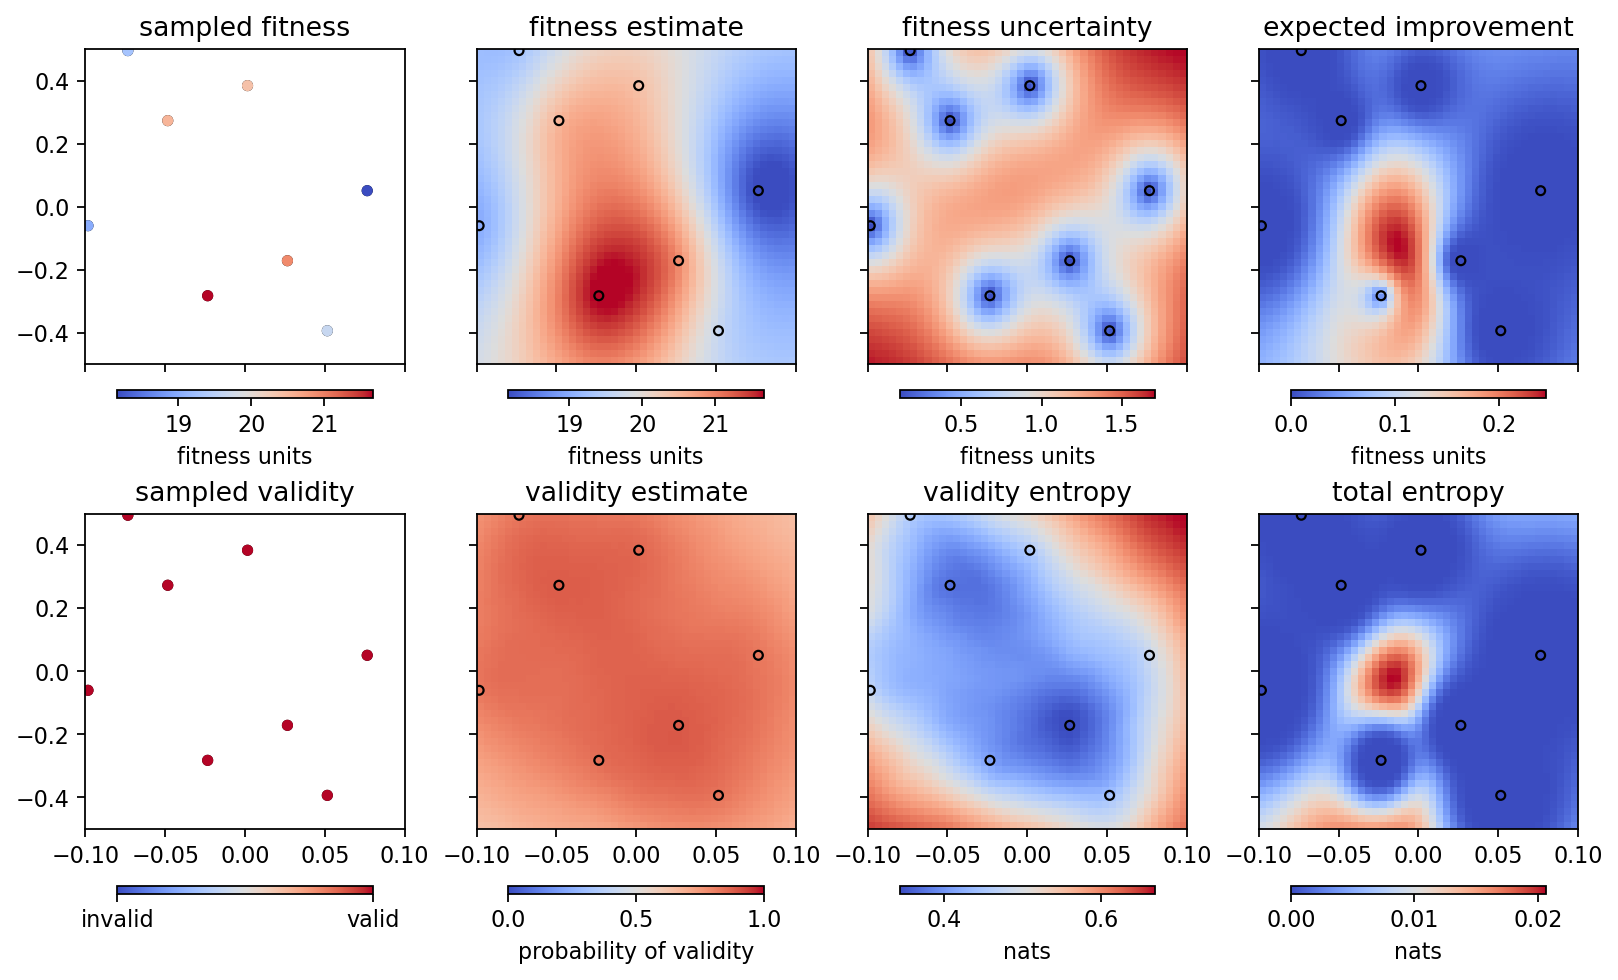

In [3]:
boa.plot_state(gridded=True)

Maximizing the expected improvement:

learning with strategy "eI" ...


    kbv_x_rot  kbv_offz    fitness
8   -0.013942 -0.111851  22.147991
9   -0.011405 -0.261377  22.262018
10  -0.037984 -0.267479  20.917875
11  -0.015517 -0.368561  22.040508


    kbv_x_rot  kbv_offz    fitness
12  -0.005681 -0.312004  22.135452
13  -0.005373 -0.195068  22.059449
14  -0.011261  0.032723  22.036755
15  -0.038103 -0.497952  20.748461


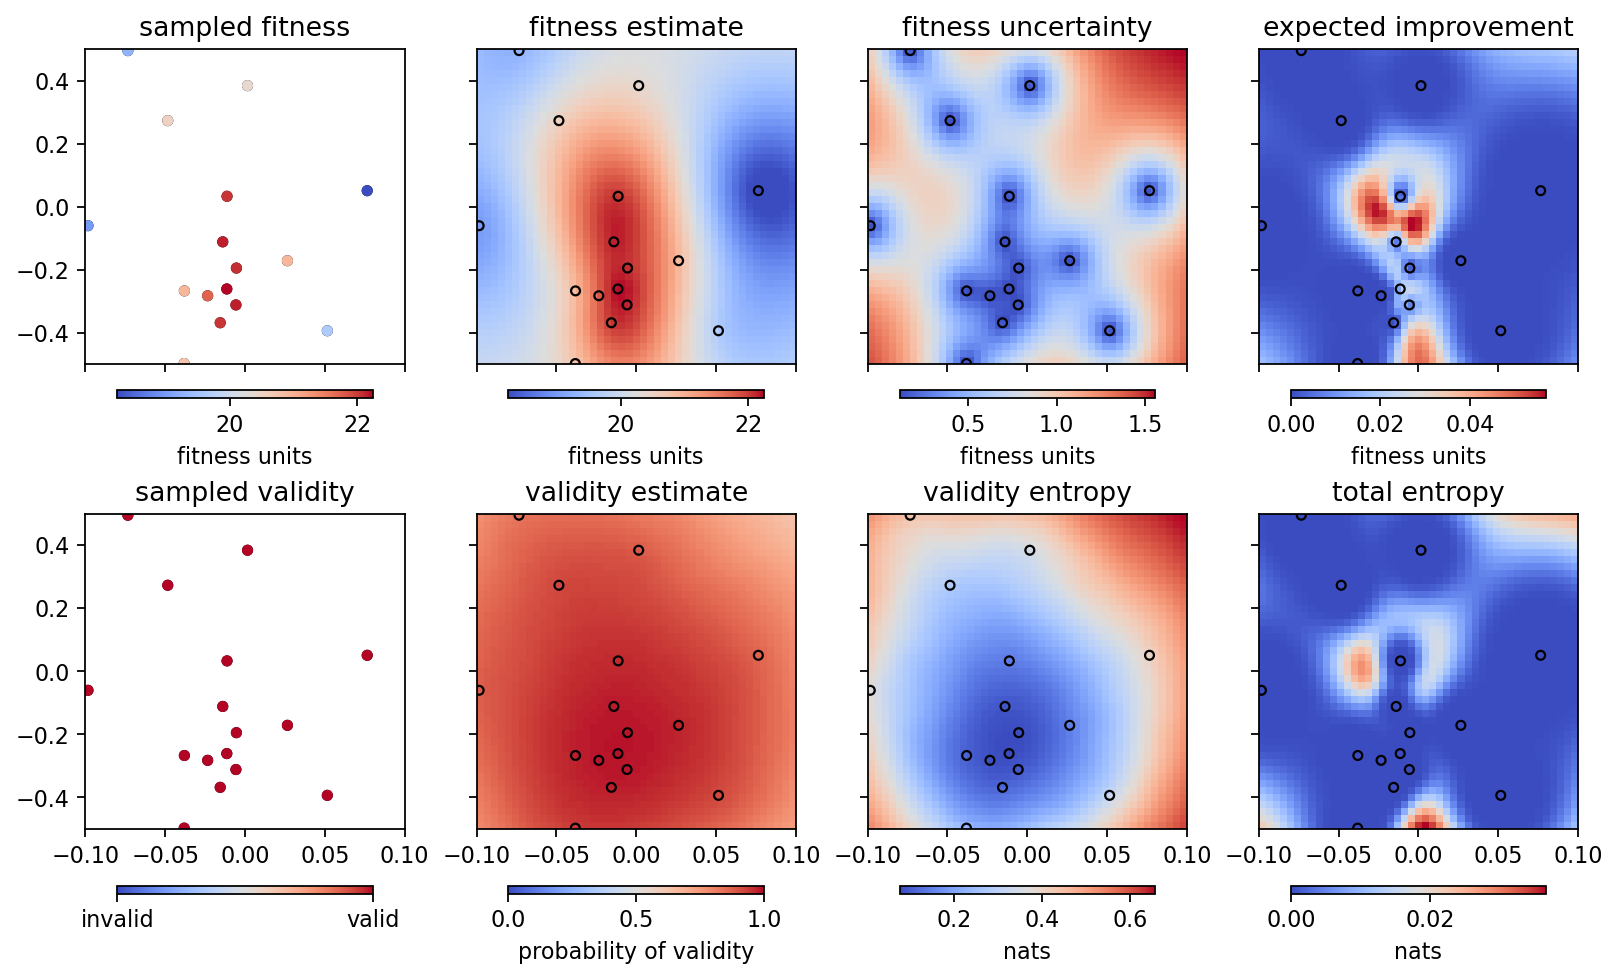

In [4]:
RE(boa.learn(strategy='eI', n_iter=2, n_per_iter=4))
boa.plot_state(gridded=True)